# First examples using xgcms new `transform` method.

In [1]:
from xgcm import Grid
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from xnemogcm import get_metrics
import xbasin

In [2]:
ds_tot = xr.open_mfdataset(
    ['NEMO_data_example/Procdata/xnemogcm.nemo_bassin.nc', 'NEMO_data_example/Procdata/_Vars/diag_eos.nc']
).isel({'exp':0}).drop_vars(['exp']).chunk({'z_f': -1, 'z_c':-1})

We need to have an extensive variable for the conservative interpolation: let's use the velocity flux (v * e3v).

In [3]:
ds_tot['Fv'] = (ds_tot.vo * ds_tot.e3v)
ds_tot.Fv.attrs = {
    'standard_name':'velocity flux',
    'long_name': 'velocity_flux',
    'units':'m^2/s'
}
ds_tot['sigma2_v'] = ds_tot.sigma_v.sel({'p_ref':2000})

tmp_grid = Grid(ds_tot)

#ds_tot['sigma2_u'] = tmp_grid.interp(ds_tot.sigma2, axis='X')
ds_tot['e3vw'] = tmp_grid.interp(ds_tot.e3w, axis='Y')
ds_tot.coords['gdepv_0'] = tmp_grid.interp(ds_tot.gdept_0, axis='Y')
ds_tot.coords['gdepvw_0'] = tmp_grid.interp(ds_tot.gdepw_0, axis='Y')
ds_tot.coords['gdept_1d'] = ds_tot.gdept_1d

ds_tot

<xarray.Dataset>
Dimensions:     (p_ref: 5, t: 50, x_c: 20, x_f: 20, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_c         (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35
  * t           (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * y_c         (y_c) int64 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
  * x_c         (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    glamt       (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    glamv       (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    gphit       (y_c) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gphiu       (y_c) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gdept_0     (z_c, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
  * p_ref       (p_ref) int64 0 1000 2000 3000 4000
  * y_f         (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 35.5 36.5 37.5 38.5 39.5
  * x_f         (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 15.5 16.5 17.5 18.5 19.5
  * z_f         (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 30.5 31.5 32.5 33.5 34.5
    glamu       (x_f) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    glamf       (x_f) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    gphiv       (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gphif       (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gdept_1d    (z_c) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    gdepw_0     (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepv_0     (z_c, y_f, x_c) float64 dask.array<chunksize=(36, 39, 20), meta=np.ndarray>
    gdepvw_0    (z_f, y_f, x_c) float64 dask.array<chunksize=(36, 39, 20), meta=np.ndarray>
Data variables:
    sigma       (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 36, 40, 20, 5), meta=np.ndarray>
    sigma_v     (t, z_c, y_f, x_c, p_ref) float64 dask.array<chunksize=(50, 36, 40, 20, 5), meta=np.ndarray>
    alpha       (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 36, 40, 20, 5), meta=np.ndarray>
    beta        (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 36, 40, 20, 5), meta=np.ndarray>
    e3u         (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    utau        (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    ubar        (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    uoce_eiv    (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    uos         (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    uo          (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    e3t         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    thetao      (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    so          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    tos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    sos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    zos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    mldr10_1    (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qsr         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qns         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qt          (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    empmr       (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    saltflx     (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    e3v         (t, z_c, y_f, x_c) float32 dask.array<chunksize=(50, 36, 40, 20), meta=np.ndarray>
    vbar        (

We remove the last T point on earth (needed for the moment by the vertical interpolation algorithm).

In [4]:
ds = ds_tot.isel({'z_c':slice(None,-1)})
ds

<xarray.Dataset>
Dimensions:     (p_ref: 5, t: 50, x_c: 20, x_f: 20, y_c: 40, y_f: 40, z_c: 35, z_f: 36)
Coordinates:
  * z_c         (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34
  * t           (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * y_c         (y_c) int64 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
  * x_c         (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    glamt       (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    glamv       (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    gphit       (y_c) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gphiu       (y_c) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gdept_0     (z_c, y_c, x_c) float64 dask.array<chunksize=(35, 40, 20), meta=np.ndarray>
  * p_ref       (p_ref) int64 0 1000 2000 3000 4000
  * y_f         (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 35.5 36.5 37.5 38.5 39.5
  * x_f         (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 15.5 16.5 17.5 18.5 19.5
  * z_f         (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 30.5 31.5 32.5 33.5 34.5
    glamu       (x_f) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    glamf       (x_f) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    gphiv       (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gphif       (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gdept_1d    (z_c) float64 dask.array<chunksize=(35,), meta=np.ndarray>
    gdepw_0     (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepv_0     (z_c, y_f, x_c) float64 dask.array<chunksize=(35, 39, 20), meta=np.ndarray>
    gdepvw_0    (z_f, y_f, x_c) float64 dask.array<chunksize=(36, 39, 20), meta=np.ndarray>
Data variables:
    sigma       (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 35, 40, 20, 5), meta=np.ndarray>
    sigma_v     (t, z_c, y_f, x_c, p_ref) float64 dask.array<chunksize=(50, 35, 40, 20, 5), meta=np.ndarray>
    alpha       (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 35, 40, 20, 5), meta=np.ndarray>
    beta        (t, z_c, y_c, x_c, p_ref) float64 dask.array<chunksize=(50, 35, 40, 20, 5), meta=np.ndarray>
    e3u         (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    utau        (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    ubar        (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    uoce_eiv    (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    uos         (t, y_c, x_f) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    uo          (t, z_c, y_c, x_f) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    e3t         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    thetao      (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    so          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    tos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    sos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    zos         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    mldr10_1    (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qsr         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qns         (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    qt          (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    empmr       (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    saltflx     (t, y_c, x_c) float32 dask.array<chunksize=(50, 40, 20), meta=np.ndarray>
    e3v         (t, z_c, y_f, x_c) float32 dask.array<chunksize=(50, 35, 40, 20), meta=np.ndarray>
    vbar        (

In [5]:
grid = Grid(ds, metrics={('Z',): ['e3t', 'e3u', 'e3v', 'e3w', 'e3vw']}, periodic=False)
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   t
X Axis (not periodic, boundary=None):
  * center   x_c --> right
  * right    x_f --> center
Z Axis (not periodic, boundary=None):
  * center   z_c --> outer
  * outer    z_f --> center
Y Axis (not periodic, boundary=None):
  * center   y_c --> right
  * right    y_f --> center

# Depth transformation

## Conservative transformation (xgcm)
The conservative method requires more input data at the moment. You have to not only specify the location of the cell centers, but also the cell faces (or bounds/boundaries). In xgcm we achieve this by defining the bounding coordinates as `outer` coordinate. 
> This method will currently not work with `left`/`right` coordinates

In [6]:
# define the target values in depth
target_values = ds.gdepw_1d

# and transform
transformed_cons = grid.transform(
    ds.Fv,
    'Z',
    target_values,
    method='conservative',
    target_data=ds.gdepvw_0
).compute()
transformed_cons = transformed_cons.rename({'z_f':'z_c'}).assign_coords({'z_c':ds.z_c})
transformed_cons.coords

Coordinates:
  * t         (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    glamt     (x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 29.0 31.0 33.0 35.0 37.0
    glamv     (x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 29.0 31.0 33.0 35.0 37.0
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
    gphiv     (y_f) float64 -0.9999 0.9999 2.999 4.994 ... 58.75 59.77 60.76
    gphif     (y_f) float64 -0.9999 0.9999 2.999 4.994 ... 58.75 59.77 60.76
  * z_c       (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32 33 34
    gdept_1d  (z_c) float64 dask.array<chunksize=(35,), meta=np.ndarray>

Now we transform back to a velocity

In [7]:
transformed_v_cons_xgcm = transformed_cons / ds.e3t_1d
transformed_v_cons_xgcm.compute()

<xarray.DataArray (t: 50, y_f: 40, x_c: 20, z_c: 35)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.88042486e-02,  2.88541019e-02,  2.91226655e-02, ...,
           7.60573203e-04,  7.59029866e-04,  7.46278051e-04],
         [-5.68709910e-02, -5.68139613e-02, -5.62922120e-02, ...,
          -4.99506846e-04, -5.96153299e-04, -6.94757167e-04],
         ...,
         [-1.25285852e-01, -8.70130539e-02,  4.59974378e-02, ...,
          -2.52681482e-05, -5.59923154e-05,  4.00662233e-05],
         [-1.05703831e-01, -4.22639668e-02,  2.76965588e-02, ...,
          -1.72939784e-05, -4.51323755e-05,  2.00694627e-05],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-2.88042486e-02, -2.88541019e-02, -2.91226655e-02, ...,
          -7.60573203e-04, -7.59029866e-04, -7.46278051e-04],
         [ 5.68709910e-02,  5.68139613e-02,  5.62922120e-02, ...,
           4.99506846e-04,  5.96153299e-04,  6.94757167e-04],
...
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * t         (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    glamt     (x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 29.0 31.0 33.0 35.0 37.0
    glamv     (x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 29.0 31.0 33.0 35.0 37.0
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
    gphiv     (y_f) float64 -0.9999 0.9999 2.999 4.994 ... 58.75 59.77 60.76
    gphif     (y_f) float64 -0.9999 0.9999 2.999 4.994 ... 58.75 59.77 60.76
  * z_c       (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32 33 34
    gdept_1d  (z_c) float64 5.0 15.0 25.0 35.0 ... 3.001e+03 3.38e+03 3.787e+03

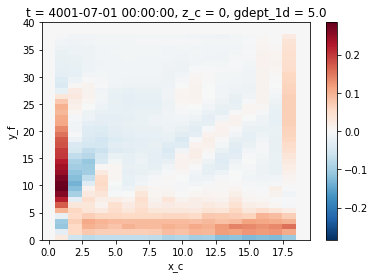

In [8]:
transformed_v_cons_xgcm.isel({'z_c':0, 't':0}).plot()

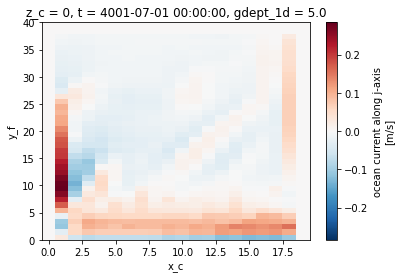

In [9]:
ds.vo.isel({'z_c':0, 't':0}).plot()

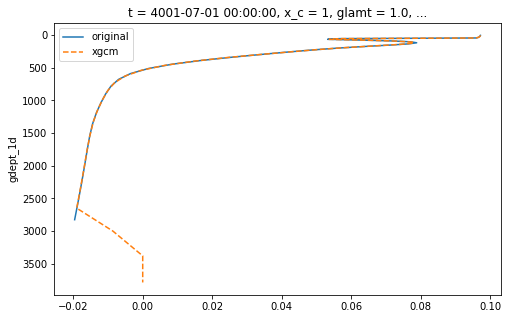

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ds.vo.isel({'x_c':1, 'y_f':5, 't':0}).plot(ax=ax, y='gdepv_0', yincrease=False, label='original')
transformed_v_cons_xgcm.isel({'x_c':1, 'y_f':5, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False, ls='--', label='xgcm')
plt.legend()

## Conservative transformation (xbasin)

For this we need to create 2 grids

In [11]:
metrics_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w']
}
metrics_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_1d', 'e3w_1d']
}
grid_fr = Grid(ds_tot, periodic=False, metrics=metrics_fr)
grid_to = Grid(ds_tot, periodic=False, metrics=metrics_to)

In [12]:
vo_to = xbasin.remap_vertical(
    ds_tot.vo,
    grid_fr,
    grid_to,
    axis='Z'
)
vo_to['gdept_1d'] = ds_tot.gdept_1d
vo_to

<xarray.DataArray 'vo' (t: 50, z_c: 36, y_f: 40, x_c: 20)>
dask.array<transpose, shape=(50, 36, 40, 20), dtype=float64, chunksize=(50, 36, 40, 20), chunktype=numpy.ndarray>
Coordinates:
  * z_c       (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35
  * t         (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
    gdept_1d  (z_c) float64 dask.array<chunksize=(36,), meta=np.ndarray>

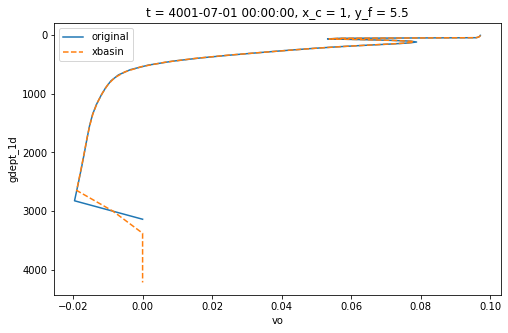

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ds_tot.vo.isel({'x_c':1, 'y_f':5, 't':0}).plot(ax=ax, y='gdepv_0', yincrease=False, label='original')
vo_to.isel({'x_c':1, 'y_f':5, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False, ls='--', label='xbasin')
plt.legend()

#### xgcm

Speed of execution of the function

In [14]:
%%timeit
grid.transform(
    ds.Fv,
    'Z',
    target_values,
    method='conservative',
    target_data=ds.gdepvw_0
)

10.6 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In reality we need to take into account the fact that we wanted to transform the velocity, not the fluxes

In [15]:
%%timeit
ds['Fv'] = (ds_tot.vo * ds_tot.e3v)
grid.transform(
    ds.Fv,
    'Z',
    target_values,
    method='conservative',
    target_data=ds.gdepvw_0
)
(transformed_cons / (ds.e3t_1d)).compute()

45.7 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### xbasin

In [16]:
%%timeit
xbasin.remap_vertical(
    ds_tot.vo,
    grid_fr,
    grid_to,
    axis='Z'
).compute()
vo_to['gdept_1d'] = ds_tot.gdept_1d

128 ms ± 2.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Values

In [17]:
X=1
Y=-3

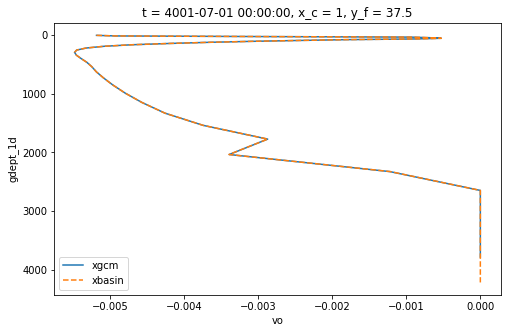

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
transformed_v_cons_xgcm.isel({'x_c':X, 'y_f':Y, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False, label='xgcm')
vo_to.isel({'x_c':X, 'y_f':Y, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False, ls='--', label='xbasin')
plt.legend()

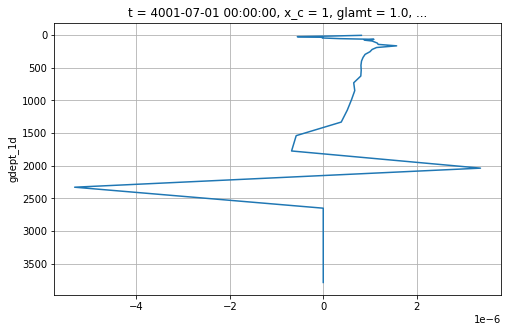

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
(transformed_v_cons_xgcm - vo_to).isel({'x_c':X, 'y_f':Y, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False)

plt.grid()

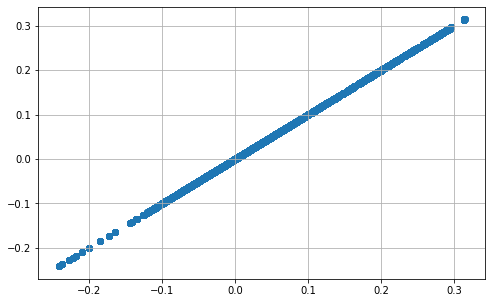

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.scatter(
    transformed_v_cons_xgcm.transpose('x_c', 'y_f', 'z_c', 't'),
    vo_to.transpose('x_c', 'y_f', 'z_c', 't').isel({'z_c':slice(None,-1)})
)

plt.grid()

In [21]:
(transformed_v_cons_xgcm - vo_to).std().compute()

<xarray.DataArray ()>
array(3.16220461e-06)

# Equivalence of the 2 methods

In [22]:
grid_1d = Grid(ds, metrics={('Z',): ['e3t_1d', 'e3w_1d']}, periodic=False)

In [23]:
vo_integrated = grid.cumint(ds.vo, axis='Z', boundary='fill', fill_value=0).compute()

transformed = grid.transform(vo_integrated, 'Z', target=ds.gdepw_1d, target_data=ds.gdepvw_0, mask_edges=False)
# mask_edges=False is necessary here

vo_transformed = grid_1d.derivative(transformed, axis='Z', boundary='extend')
vo_transformed.coords['gdept_1d'] = ds.gdept_1d

In [24]:
transformed

<xarray.DataArray (t: 50, y_f: 40, x_c: 20, z_f: 36)>
dask.array<interp_1d_linear, shape=(50, 40, 20, 36), dtype=float32, chunksize=(50, 39, 20, 36), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) object 4001-07-01 00:00:00 ... 4050-07-01 00:00:00
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
  * x_c      (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    glamt    (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    glamv    (x_c) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    gphiv    (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    gphif    (y_f) float64 dask.array<chunksize=(40,), meta=np.ndarray>
  * z_f      (z_f) float64 -0.5 0.5 1.5 2.5 3.5 4.5 ... 30.5 31.5 32.5 33.5 34.5

The integrals before and after should match

In [25]:
np.abs((grid.integrate(ds.vo, axis='Z') - grid_to.integrate(vo_transformed, axis='Z'))).max().compute()

<xarray.DataArray ()>
array(7.10542736e-15)

In fact, the xgcm conservative method is equivalent to linear interpolation of the vertically integrated scalars

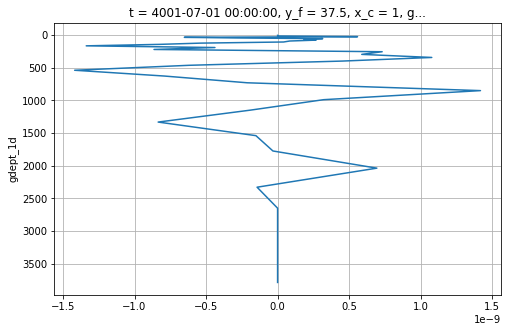

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
(vo_transformed - transformed_v_cons_xgcm).isel({'x_c':X, 'y_f':Y, 't':0}).plot(ax=ax, y='gdept_1d', yincrease=False)

plt.grid()

In [27]:
(vo_transformed - transformed_v_cons_xgcm).std().compute()

<xarray.DataArray ()>
array(4.31847532e-09)

## Execution time (intensive variables)

In [28]:
%%timeit
ds['Fv'] = (ds_tot.vo * ds_tot.e3v)
grid.transform(
    ds.Fv,
    'Z',
    target_values,
    method='conservative',
    target_data=ds.gdepvw_0
)
(transformed_cons / (ds.e3t_1d)).compute()

48.9 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
vo_integrated = grid.cumint(ds.vo, axis='Z', boundary='fill', fill_value=0).compute()
transformed = grid.transform(vo_integrated, 'Z', target=ds.gdepw_1d, target_data=ds.gdepvw_0, mask_edges=False) # mask_edges=False is necessary here
grid_1d.derivative(transformed, axis='Z', boundary='extend').compute()

77.7 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
